In [2]:
zip_path = '/content/drive/My\ Drive/BCML/datasets/DeepLearning/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

!rm /content/santa-dataset.zip

In [3]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD , RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

# **Base Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


In [5]:
dataset_dir = '/content/santa-dataset'

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
history=model.fit(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Epoch 1/75
6/6 [==============================] - 13s 2s/step - loss: 1.0128 - accuracy: 0.5227 - val_loss: 0.6827 - val_accuracy: 0.5269
Epoch 2/75
6/6 [==============================] - 12s 2s/step - loss: 0.6627 - accuracy: 0.5423 - val_loss: 0.6899 - val_accuracy: 0.5923
Epoch 3/75
6/6 [==============================] - 12s 2s/step - loss: 0.6467 - accuracy: 0.6420 - val_loss: 0.8098 - val_accuracy: 0.5192
Epoch 4/75
6/6 [==============================] - 13s 2s/step - loss: 0.6093 - accuracy: 0.6752 - val_loss: 0.5766 - val_accuracy: 0.7115
Epoch 5/75
6/6 [==============================] - 13s 2s/step - loss: 0.4890 - accuracy: 0.7900 - val_loss: 0.5719 - val_accuracy: 0.7231
Epoch 6/75
6/6 [==============================] - 12s 2s/step - loss: 0.5377 - accuracy: 0.7326 - val_loss: 0.5435 - val_accuracy: 0.7231
Epoch 7/75
6/6 [==============================] - 13s 2s/step - loss: 0.4464 - accuracy: 0.7749 - val_loss: 0.6661 - val_accuracy: 0.6308
Epoch 8/75
6/6 [==================

In [ ]:
min(history.history['val_loss'])

0.33798694610595703

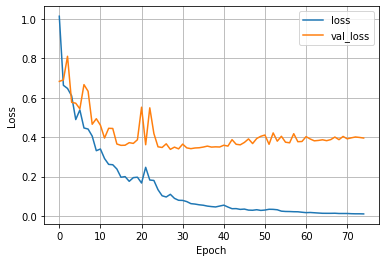

In [ ]:
plot_loss(history)

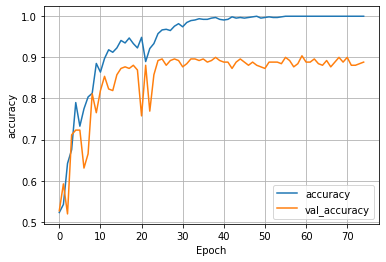

In [ ]:
plot_accuracy(history)

Epoch 28/75
6/6 [==============================] - 14s 2s/step - loss: 0.1101 - accuracy: 0.9653 - val_loss: 0.3380 - val_accuracy: 0.8923

# **Best CNN**

In [16]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,horizontal_flip=True,zoom_range=0.1,shear_range=0.1)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [17]:
train_augmented_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_augmented_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(200,200,3), activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

opt=RMSprop(lr=0.0001)

model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 50, 50, 128)      

In [ ]:
history=model.fit(train_augmented_iterator, steps_per_epoch=len(train_augmented_iterator), validation_data=test_augmented_iterator, validation_steps=len(test_augmented_iterator), epochs=75)

Epoch 1/75
6/6 [==============================] - 18s 3s/step - loss: 0.6885 - accuracy: 0.5060 - val_loss: 0.6657 - val_accuracy: 0.5000
Epoch 2/75
6/6 [==============================] - 16s 3s/step - loss: 0.6385 - accuracy: 0.5151 - val_loss: 0.6192 - val_accuracy: 0.8077
Epoch 3/75
6/6 [==============================] - 17s 3s/step - loss: 0.5709 - accuracy: 0.7417 - val_loss: 0.5321 - val_accuracy: 0.8423
Epoch 4/75
6/6 [==============================] - 16s 3s/step - loss: 0.5490 - accuracy: 0.8082 - val_loss: 0.4998 - val_accuracy: 0.8462
Epoch 5/75
6/6 [==============================] - 17s 3s/step - loss: 0.4630 - accuracy: 0.8384 - val_loss: 0.6593 - val_accuracy: 0.7692
Epoch 6/75
6/6 [==============================] - 17s 3s/step - loss: 0.4358 - accuracy: 0.8776 - val_loss: 0.4006 - val_accuracy: 0.8615
Epoch 7/75
6/6 [==============================] - 18s 3s/step - loss: 0.4306 - accuracy: 0.8489 - val_loss: 0.4084 - val_accuracy: 0.8577
Epoch 8/75
6/6 [==================

In [ ]:
min(history.history['val_loss'])

0.19208741188049316

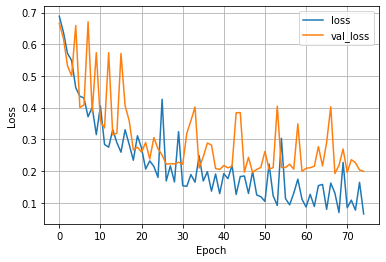

In [ ]:
plot_loss(history)

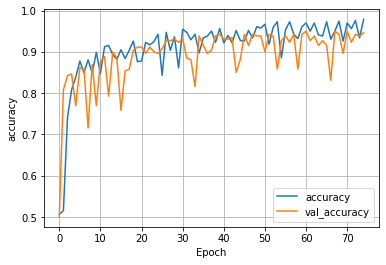

In [ ]:
plot_accuracy(history)

Epoch 71/75
6/6 [==============================] - 19s 3s/step - loss: 0.0840 - accuracy: 0.9698 - val_loss: 0.1953 - val_accuracy: 0.9500

# **Model VGG-16**

In [20]:
train_augmented_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(224, 224))
test_augmented_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(224, 224))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import vgg16

vgg_conv= vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(224,244,3))

for layer in vgg_conv.layers[:]:
    layer.trainable = False

fine_tuned_model = Sequential()

fine_tuned_model.add(vgg_conv)
fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(1024,activation='relu'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(1,activation='sigmoid'))


opt=RMSprop(learning_rate=0.001)
fine_tuned_model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

fine_tuned_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 1025      
Total params: 40,406,849
Trainable params: 25,692,161
Non-trainable params: 14,714,688
_________________________________________________________________


In [22]:
history=fine_tuned_model.fit(train_augmented_iterator, steps_per_epoch=len(train_augmented_iterator), validation_data=test_augmented_iterator, validation_steps=len(test_augmented_iterator), epochs=20)

Epoch 1/20
6/6 [==============================] - 19s 3s/step - loss: 9.3883 - accuracy: 0.6208 - val_loss: 0.9458 - val_accuracy: 0.8923
Epoch 2/20
6/6 [==============================] - 18s 3s/step - loss: 0.4881 - accuracy: 0.9320 - val_loss: 0.3316 - val_accuracy: 0.9538
Epoch 3/20
6/6 [==============================] - 17s 3s/step - loss: 0.3677 - accuracy: 0.9350 - val_loss: 0.3026 - val_accuracy: 0.9462
Epoch 4/20
6/6 [==============================] - 18s 3s/step - loss: 2.1623 - accuracy: 0.8142 - val_loss: 4.7477 - val_accuracy: 0.5885
Epoch 5/20
6/6 [==============================] - 18s 3s/step - loss: 1.0229 - accuracy: 0.9033 - val_loss: 0.3112 - val_accuracy: 0.9346
Epoch 6/20
6/6 [==============================] - 18s 3s/step - loss: 0.3018 - accuracy: 0.9456 - val_loss: 0.2390 - val_accuracy: 0.9692
Epoch 7/20
6/6 [==============================] - 18s 3s/step - loss: 0.1311 - accuracy: 0.9653 - val_loss: 0.2478 - val_accuracy: 0.9654
Epoch 8/20
6/6 [==================

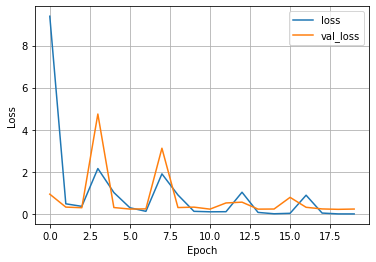

In [38]:
plot_loss(history)

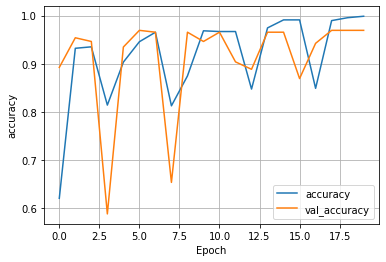

In [39]:
plot_accuracy(history)

In [37]:
historydf = pd.DataFrame(history.history)
historydf.sort_values(by=['val_accuracy'],ascending=False)

,loss,accuracy,val_loss,val_accuracy
19,0.008554,0.998489,0.239420,0.969231
18,0.009570,0.995468,0.225696,0.969231
17,0.048912,0.989426,0.244770,0.969231
5,0.301849,0.945619,0.239002,0.969231
8,0.907942,0.874622,0.310487,0.965385
14,0.015678,0.990937,0.240667,0.965385
13,0.079510,0.974320,0.235456,0.965385
10,0.108746,0.966767,0.235700,0.965385
6,0.131053,0.965257,0.247809,0.965385
1,0.488144,0.932024,0.331604,0.953846


Epoch 19/20

6/6 [==============================] - 18s 3s/step - loss: 0.0096 - accuracy: 0.9955 - val_loss: 0.2257 - val_accuracy: 0.9692